<a href="https://colab.research.google.com/github/tgibbons-css/AdaptiveCode/blob/master/6115_Chap_4_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4: Training Models

Use this notebook as the starting point for the Practice activities.

## Writeup

Use the [ Unit 1 Writeup](https://docs.google.com/document/d/1vOh8o9pSkUzLklFNhne4deMeHNyVBpeotbXCXk7BvTs/copy) to answer the questions posed in this notebook


Watch the [Chapter 4 Notebook Walkthough Video by Tom](https://www.youtube.com/watch?v=cjmgRHytv9k)


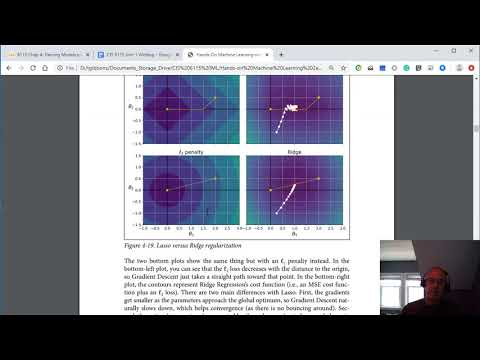

In [0]:
# Display video link below
from IPython.lib.display import YouTubeVideo
YouTubeVideo('cjmgRHytv9k')

# Training Models
We will try out a couple traditional regression and classification models that you may have covered in earlier classes.
- K-Nearest Neighbors *(actually mentioned in Chapter 1)*
- Linear Regression
- Logistics Regression

In Chapters 5 and 6 we will compare these methods to:
- Support Vector Machines (SVM) 
- Decision Trees 
    

    

## Iris Flower Dataset

*Note: This description comes from [Google's Custom Training Walkthroughs](https://www.tensorflow.org/tutorials/eager/custom_training_walkthrough).*

Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to classify flowers statistically. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest—we're going to classify Iris flowers based on the length and width measurements of their [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal).

The Iris genus entails about 300 species, but our program will only classify the following three:

* Iris setosa
* Iris virginica
* Iris versicolor

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Iris setosa</a> (by <a href="https://commons.wikimedia.org/wiki/User:Radomil">Radomil</a>, CC BY-SA 3.0), <a href="https://commons.wikimedia.org/w/index.php?curid=248095">Iris versicolor</a>, (by <a href="https://commons.wikimedia.org/wiki/User:Dlanglois">Dlanglois</a>, CC BY-SA 3.0), and <a href="https://www.flickr.com/photos/33397993@N05/3352169862">Iris virginica</a> (by <a href="https://www.flickr.com/photos/33397993@N05">Frank Mayfield</a>, CC BY-SA 2.0).<br/>&nbsp;
  </td></tr>
</table>

Fortunately, someone has already created a [data set of 120 Iris flowers](https://en.wikipedia.org/wiki/Iris_flower_data_set) with the sepal and petal measurements. This is a classic dataset that is popular for beginner machine learning classification problems. Flower measurements provided are:
- Sepal Length 	
- Sepal Width	
- Petal Length	
- Petal Width



# Section 4.0: Set up libraries and training data
=== *You must run this section to set up things for any of the sections below * ===




## Setting up Python tools

We'll use five libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
- [scikit-learn](https://scikit-learn.org/stable/) : a machine learning python library




In [0]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="white", color_codes=True)

# We'll also import libraries from scikit-learn
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

print ("Libraries imported")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries imported


In [0]:
print ("Hello World")

Hello World


## Read in the Iris flower data
The Iris flower data is read in from a file stored on the internet.
<p>
It is stored in a Pandas DataFrame which is similar to an internal spreadsheet in that the data is stored in rows and columns.

In [0]:
# Read in the data file from stored in a raw file in GitHub
url = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/Iris.csv'
iris = pd.read_csv(url)
# Set the Id column as the index since it is unique for each flower
iris.set_index('Id', inplace=True)

In [0]:
# Display the first 5 flowers to make sure the data was read in
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Section 4.1: Linear Regression
*Remember, you must run the code in Section 0 before running this code.*


## Linear Regression 

The textbook coverage of linear regression is technical and more than we need to simply apply the model. So, we will simply look at applying linear regression to predict flower measurements using the iris dataset.

First we will graph the petal length against the sepal length to see how they are related.

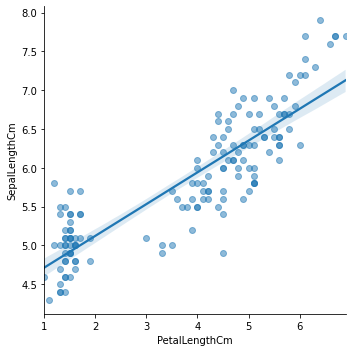

In [0]:
sns.lmplot(x='PetalLengthCm', y='SepalLengthCm', data=iris, scatter_kws={'alpha':0.5}) 

## Scikit-learn Model
Chapter 1 of the textbook (page 21) introduces the [Scikit-learn machine learning library](https://scikit-learn.org/stable/index.html) which we use throughout this course.

The code below creates a basic linear regression model using this library. This model uses the petal length to predict the sepal length of iris flowers.

## Standard Variable Names: X and y

When we use machine learning models, we will generally use these variables
- X will be the input data. It is often an array or vector so we use a capital letter. In this case it is the "PetalLengthCm"
- y will be the output data or what we want to predict. It is often a single value so we use a lowercase letter. In this case the "SepalLengthCm"

In [0]:
# from sklearn.linear_model import LinearRegression

# Analyze the relationship between petal length and sepal length
X = iris[['PetalLengthCm']]
y = iris[['SepalLengthCm']]
# Set up Linear Regression Model uisng the scikit-learn library imported above
linearModel = LinearRegression()
linearModel.fit(X,y)
print ("The y-intercept of the linear model is: ", linearModel.intercept_)
print ("The slope of the linear model is:" , linearModel.coef_)

# Make a prediction for a flower with a petal length of 3.0 cm
X_new = [[3.0]]                            # Petal length of new flower
y_predited = linearModel.predict(X_new)    # Predict the sepal length given the pedal length
print("The model predicts that a flower with a pedal length of ", X_new, "should have a sepal length of ", y_predited) 

The y-intercept of the linear model is:  [4.30556546]
The slope of the linear model is: [[0.4091259]]
The model predicts that a flower with a pedal length of  [[3.0]] should have a sepal length of  [[5.53294315]]


## Measure the performance of the model
From Chapter 2, page 39 of *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*
> Your next step is to select a performance measure. A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors. 

We will acutally use the Mean Square Error (MSE) instead of the Square Root of Mean Square Error (RMSE). Our models want to keep the error as small as possible.

![RMSE graph](https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/images/estimating_coefficients.png?token=AH0Y7JmsKZPG913jPp4rVGpOba5gxbonks5ZFEq7wA%3D%3D)

## Creating a Test Set
From Chapter 2, page 51 of *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*
> Creating a test set is theoretically simple: pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside:

We will also break up the data using 80% of the flower samples for training the model and keeping 20% for testing the model

- X_train : The iris pedal length used for training the model
- X_test : The iris pedal length used for testing the model
- y_train : The iris sepal length used for training the model
- y_test : The iris sepal length used for testing the model

We will only use the training data for fitting the model and the testing data to evaluate the model

---

*Some of this code is modeled after SciKit Learns' [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)*

In [0]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# Analyze the relationship between petal length and sepal length
X = iris[['PetalLengthCm']]
y = iris[['SepalLengthCm']]

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set up Linear Regression Model uisng the scikit-learn library imported above
linearModel = LinearRegression()
linearModel.fit(X_train,y_train)
print ("The y-intercept of the linear model is: ", linearModel.intercept_)
print ("The slope of the linear model is:" , linearModel.coef_)

# Make predictions using the testing set
y_predicted = linearModel.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))


The y-intercept of the linear model is:  [4.29888525]
The slope of the linear model is: [[0.41056266]]
Mean squared error: 0.13


## Task 4.1: Mean Squared Error

---
Answer the following questions in the [Unit 1 Writeup](https://docs.google.com/document/d/1vOh8o9pSkUzLklFNhne4deMeHNyVBpeotbXCXk7BvTs/copy). *Remember, you may have already created your own copy of the writup, so use that.*


**Question 4.1.1:** What Mean Square Error did you model report?

**Question 4.1.2:** Find a clear definition of Mean Square Error or Root Mean Square Error (RMSE) and give it, along with a URL to where you found it. 

**Question 4.1.3:** Do we want a model with a low Mean Square Error or a high Mean Square Error? Why?



## Share to Discussion Area

I encourage you to share any questions or comments related to this chapter to the course discussion area.

Remember you must post something to the discussion area in each unit. 

## Visualizing our predictions

The graph below shows the training data in green which was used the create the model. 

This allowed us to create a linear model shown as a blue line.

The training data in red was used to evaluate our model.

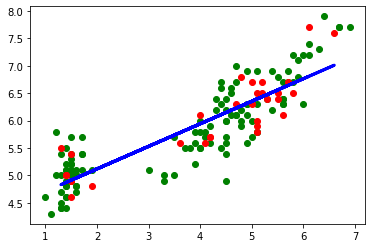

In [0]:
# Plot outputs
plt.scatter(X_train, y_train,  color='green')
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_predicted, color='blue', linewidth=3)
plt.show()

## Gradient Descent
From Chapter 2, page 118 of *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*
> Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

The textbook covers gradient descent in this chapter, but we will discuss it more in later chapters when we are working with more complicated training methods. For now, just remember that gradient descent is a way to find good values for parameters in a model by slowly tweeking the parameters, making them better each time. The **learning rate** sets how much the parameters are tweeked each time. In the case of linear regression, the two parameters trying to determine are the y-intercept and the slope of the line for our model.

- Batch Gradient Descent (page 121): It is faster to determine how much to tweek the parameters if you consider all the training data points at once. While this is faster, it can require a lot of RAM to hold all the data in memory at once.
- Stochastic Gradient Descent (page 124): You can tweek the parameters by looking at one training example at a time. While this requires little RAM, it takes longer since many calculations are repeated.
- Mini-batch Gradient Descent (page 127): All training algorithms we will see use a sub-set of the training data to tweek the parameters. Generally we will want the batch size as large as possible given the memory of our computer.

>  Instead of computing the gradients based on the full training set
(as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. (Page 127)


# Section 4.2: Logistics Regresion and Classification
*Remember, you must run the code in Section 0 before running this code.*


## Skipping Polynomial Regression and other methods (page 128-140)
The textbook discusses using the adding in the squares or cubes of features and then using linear regression--something called polynomial regression. It also discusses some other forms of regression. We will skip these method in order to focus on methods more commonly used in machine learning.

## Logistic Regression
From Chapter 2, page 142 of *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*
>As we discussed in Chapter 1, some regression algorithms can be used for classification (and vice versa). Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class.

We will turn again to our iris flower dataset

> Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. (page 146)

First, we will set out training inputs to just the PetalWidthCm values and for the output we will predict 1 if the iris is a Iris-virginica and 0 otherwise. *The code for setting up X and y are a little different than the book since we are using a different version of the iris dataset which has the data formated a little differently.*

Then we simply create a Logistic Regression model and train it on the data. Once trained we can use it to make predictions. Given the pedal width of a flower it will predict if the iris is a Iris-virginica or not.


Plot the probablility determined by the model of a flower being an Iris virginica based on its petal width 
Mean squared error: 0.07
An iris with a petal width of 1.7 should be a Iris virginica (1=Iris viginica) :  1
An iris with a petal width of 1.5 should not be a Iris virginica (1=Iris viginica) :  0


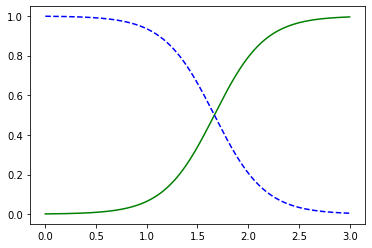

In [0]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# Analyze the relationship between petal length and sepal length
X = iris[['PetalWidthCm']]
y_strings = iris[['Species']]
y = (iris[['Species']] == "Iris-virginica").astype(np.int) 

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Setup the Logistic Regression Model uisng the scikit-learn library imported above
logisticsModel = LogisticRegression()
logisticsModel.fit(X_train,y_train)

print ("Plot the probablility determined by the model of a flower being an Iris virginica based on its petal width ")
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = logisticsModel.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

# Make predictions using the testing set
y_predicted = logisticsModel.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))

predict_results = logisticsModel.predict([[1.7], [1.5]])
print("An iris with a petal width of 1.7 should be a Iris virginica (1=Iris viginica) : ", predict_results[0] )
print("An iris with a petal width of 1.5 should not be a Iris virginica (1=Iris viginica) : ", predict_results[1] )

## Softmax Regression
> The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers (as discussed in Chapter 3). This is called Softmax Regression, or Multinomial Logistic Regression. (page 148)

While the textbook only uses two features for this prediction, we will use all four measurements for input to our model. The output will be a prediction of what species the iris is.

The code then uses the scikit-learn score(X_test, y_test) method to compare the categories predicted by the model with the actual cateagoies giving in y_test. The result is a precent where 1.0 means the model correctly identified 100% of the test flowers where 0.95 means the model correctly identified 95% of the test flowers.

In [0]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# Use the first four collumn for input into the model and the final iris label as output for training
# X = iris.iloc[:, 0:4]
# y = iris.iloc[:, 4]
# A better way to select which columns to use for input and output
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = iris[feature_columns].values
y = iris['Species'].values  

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Setup the Logistic Regression Model uisng the scikit-learn library imported above
softmaxRegressionModel = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmaxRegressionModel.fit(X_train,y_train)

# Score the predictions using the testing set
score = softmaxRegressionModel.score(X_test, y_test)
print ("The score for this model is ", score)

# The parameter order is SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
prediction = softmaxRegressionModel.predict([[5.2, 3.3, 1.4, 0.2]])
print ("Predicted iris species is with measurements [5.2, 3.3, 1.4, 0.2] is ", prediction)

The score for this model is  0.9333333333333333
Predicted iris species is with measurements [5.2, 3.3, 1.4, 0.2] is  ['Iris-setosa']


## Task 4.2: Softmax Regression
---
Answer the following questions in the [Unit 1 Writeup](https://docs.google.com/document/d/1vOh8o9pSkUzLklFNhne4deMeHNyVBpeotbXCXk7BvTs/copy). *Remember, you may have already created your own copy of the writup, so use that.*


**Question 4.2.1:** What score did your model report?

**Question 4.2.2:** The textbook tries to predict the iris type using only two measurements, while our code above uses all four flower measurements. Do you think a model will generally be more accurate if it has more data to use when classifying?


#Section 4.3:  K-Nearest Neighbors (KNN)
*Remember, you must run the code in Section 0 before running this code.*



*The textbook mentions the K-Nearest Neighbor in Chapter 1 (page 22) of the text. We are including it here since it is a well known algorithm you should be familar with.*

K-Nearest Neighbors is a relatively simple classification algorithm. Given a set of labeled data, when a new unknown data point needs to be classified, we find the known points that are closest to it. 

Let's say we are classifying fruit as either apples or oranges. Assume we measure two parameters for each fruit.
- The smoothness as a number between 1 and 10 
- Amount of red color as a number between 0 and 25

We have a set of fruit we already know are either apples or oranges. When a new fruit arrives we measure its smoothness and red color and compare these values to the known fruit as follows:
1. We use the Euclidean distance to calculate how near the new fruit is to every known fruit.
1. We find the 3 nearest known fruits. Let us assume they are an Orange, an Apple and another Apple.
1. We classify the new fruit based on what is the most common type of neighbor; in this case, it is labeled as an Apple since two of the three neighbors are apples.


![KNN Image]( https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/K_nearest_neighbors.jpg )

In the example above we looked at the 3 nearest neighbors, but we could have just as well looked at the 5 nearest neighbors or the 1 neighbor that was the nearest. In general, we use the term K Nearest Neighbors and assume K can be any whole number.

The KNN algorithm works well for small datasets but does not work well on large datasets since it can take a lot of time and memory to compare the new item with every known item in the data set.

For another overview see [KNN Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn) by Avinash Navlani



## Break up data parts for training and testing

We will also break up the data using 80% of the flower samples for training the model and keeping 20% for testing the model

- X_train : The iris sizes used for training the model
- X_test : The iris sizes used for testing the model
- y_train : The species used for training the model
- y_test : The species used for testing the model

We will only use the training data for fitting the model.


In [0]:
# from sklearn.model_selection import train_test_split

# Use the first four collumn for input into the model and the final iris label as output for training
# X = iris.iloc[:, 0:4]
# y = iris.iloc[:, 4]
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = iris[feature_columns].values
y = iris['Species'].values

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2)

## Task 4.3: KNN on Iris data
---
Answer the following questions in the [Unit 1 Writeup](https://docs.google.com/document/d/1vOh8o9pSkUzLklFNhne4deMeHNyVBpeotbXCXk7BvTs/copy). *Remember, you may have already created your own copy of the writup, so use that.*


**Question 4.3.1:**  The code below runs the KNN algorithm initially with 5 neighbors. Try this code out with different numbers of neighbors and record the results here.

Try to get a score as high as you can. A score of 100% or 1.0 means the algorithm is classifying the new data with 100% accuracy.

---
- Score for 1 Neighbor: 
- Score for 3 Neighbor:
- Score for 5 Neighbor: **0.96** *(Your score might be slightly different)*
- Score for 20 Neighbor:
- Score for 50 Neighbor:
- Score for your choice of Neighbors:


In [0]:
from sklearn.neighbors import KNeighborsClassifier
# Set up the K-Nearest neighbor model using the k nearest neighbors. Change the value of n_neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model on the iris data
knn_model.fit(X_train, y_train)
score = knn_model.score(X_test, y_test)
print ("The score for this model is ", score)

The score for this model is  0.9666666666666667


##  Prediction
Once we have trained or fit the model to the data, we can use it to make predictions.

Here we will predict the iris species for a new flower with 
- SepalLengthCm = 5.2	
- SepalWidthCm = 3.3
- PetalLengthCm = 1.4
- PetalWidthCm	= 0.2

This should be a Iris-setosa


In [0]:
# The parameter order is SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

prediction = knn_model.predict([[5.2, 3.3, 1.4, 0.2]])

print ("Predicted iris species is ", prediction)


Predicted iris species is  ['Iris-setosa']
